In [ ]:
import tensorflow as tf

In [ ]:
a = tf.constant(20)
print(a)

tf.Tensor(20, shape=(), dtype=int32)


In [ ]:
b = tf.constant(30)
#c = a+b
#print(c)
c = tf.add(a,b)
print(c)

tf.Tensor(50, shape=(), dtype=int32)


In [ ]:
matrix = tf.Variable([[1,3], [3,2]])
matrix2 = tf.Variable([[3,9], [7,7]])
print(tf.matmul(matrix , matrix2))

tf.Tensor(
[[24 30]
 [23 41]], shape=(2, 2), dtype=int32)


In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train.shape , y_train.shape

((60000, 28, 28), (60000,))

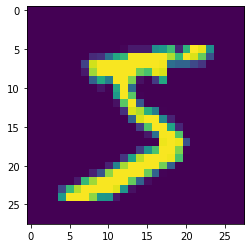

5


In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
plt.show()
print(y_train[0])

In [ ]:
x_train = x_train.reshape(x_train.shape[0], -1)/255.0 # the ml algorithms most of the time requires a 2d data, but here the dimesion is 3d i.e.
# 60000,28,28 so to convert it into 2d data we just multiply the pixel values i.e. 28*28.
# now it had to be as (60000 , 784) but we also need to scale the values from 0-1 so to acheive this we divided 784/-784 which came out to be -1.
x_test = x_test.reshape(x_test.shape[0], -1)/255.0

In [ ]:
y_train = tf.keras.utils.to_categorical(y_train) # we are doing one hot encoding here.
y_test = tf.keras.utils.to_categorical(y_test)

In [ ]:
x_train.shape # it means there are 60k rows and 784 columns.

(60000, 784)

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model = Sequential()
model.add(Dense(256, activation = 'relu', input_shape = (784,))) # this is for 1st hidden layer it requires the number of units and the
# activation function and the input shape for the 1st hidden layer it's a matrix of just 1 column with 784 units/features in it.
model.add(Dense(256, activation = 'relu')) # hidden layer 2.
model.add(Dense(10, activation = 'softmax')) # now since this is multiclass classification we will not use sigmoid function here, if it had been
#a binary classification we would have used sigmoid function as the activation function here.

In [ ]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy']) # adam is a kind of stochastic gradient.
#It reduces the error by updating the weights. If this was a binary classification problem we would have used binary cross entropy
#but this is a multiclass classification so we are using this loss function.
# In metric we mean is on what basis we want to optimize our model, so we want to optimize our model on accuracy metric so we will pass accuracy

In [ ]:
model.fit(x_train, y_train, epochs = 10, batch_size = 1024) # we will fit our model we will give input and output of our training data.
# batch_size means how we want to train our model like if we don't pass batch_size the whole model will get trained in one go, but if we give
# batch_size then it will get trained on the batches and batches would be the value we pass.

# There will be 59 batches because when we divide 60k by 1024 we will get 59.

# ---------------IMPORTANT-------------------------
# If the batch size is 1000, we can complete an epoch with a single iteration. Similarly, if the batch size is 500, an epoch takes two
#iterations. So, if the batch size is 100, an epoch takes 10 iterations to complete. Simply, for each epoch, the required number of iterations
#times the batch size gives the number of data points.

Epoch 1/10
59/59 [==============================] - 2s 27ms/step - loss: 0.5841 - accuracy: 0.8447
Epoch 2/10
59/59 [==============================] - 2s 29ms/step - loss: 0.2064 - accuracy: 0.9393
Epoch 3/10
59/59 [==============================] - 2s 27ms/step - loss: 0.1431 - accuracy: 0.9582
Epoch 4/10
59/59 [==============================] - 2s 26ms/step - loss: 0.1113 - accuracy: 0.9679
Epoch 5/10
59/59 [==============================] - 2s 27ms/step - loss: 0.0881 - accuracy: 0.9742
Epoch 6/10
59/59 [==============================] - 2s 26ms/step - loss: 0.0734 - accuracy: 0.9785
Epoch 7/10
59/59 [==============================] - 2s 32ms/step - loss: 0.0592 - accuracy: 0.9834
Epoch 8/10
59/59 [==============================] - 3s 47ms/step - loss: 0.0514 - accuracy: 0.9852
Epoch 9/10
59/59 [==============================] - 3s 50ms/step - loss: 0.0432 - accuracy: 0.9880
Epoch 10/10
59/59 [==============================] - 3s 52ms/step - loss: 0.0369 - accuracy: 0.9898


In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0736 - accuracy: 0.9779


[0.07355228066444397, 0.9779000282287598]

In [ ]:
from tensorflow.keras import Model

In [ ]:
from tensorflow.keras.layers import concatenate,Input

In [ ]:
input = Input(shape = [784,])

In [ ]:
hidden_1 = Dense(256, activation = 'relu')(input)

In [ ]:
hidden_2 = Dense(256, activation = 'relu')(hidden_1)

In [ ]:
hidden_3 = Dense(256, activation = 'relu')(input)

In [ ]:
from keras.layers import Concatenate
concat = Concatenate()([hidden_2, hidden_3])
output = Dense(10, activation = 'softmax')(concat)
model = Model(inputs = [input], outputs = [output])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 784)]        0           []                               
                                                                                                  
 dense_3 (Dense)                (None, 256)          200960      ['input_1[0][0]']                
                                                                                                  
 dense_4 (Dense)                (None, 256)          65792       ['dense_3[0][0]']                
                                                                                                  
 dense_5 (Dense)                (None, 256)          200960      ['input_1[0][0]']                
                                                                                              

In [ ]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.fit(x_train,y_train, epochs = 10, batch_size = 1024)

Epoch 1/10
59/59 [==============================] - 4s 46ms/step - loss: 0.0087 - accuracy: 0.9977
Epoch 2/10
59/59 [==============================] - 2s 40ms/step - loss: 0.0038 - accuracy: 0.9996
Epoch 3/10
59/59 [==============================] - 2s 41ms/step - loss: 0.0031 - accuracy: 0.9997
Epoch 4/10
59/59 [==============================] - 2s 41ms/step - loss: 0.0024 - accuracy: 0.9999
Epoch 5/10
59/59 [==============================] - 2s 41ms/step - loss: 0.0021 - accuracy: 0.9999
Epoch 6/10
59/59 [==============================] - 2s 41ms/step - loss: 0.0038 - accuracy: 0.9992
Epoch 7/10
59/59 [==============================] - 2s 40ms/step - loss: 0.0057 - accuracy: 0.9985
Epoch 8/10
59/59 [==============================] - 2s 41ms/step - loss: 0.0063 - accuracy: 0.9982
Epoch 9/10
59/59 [==============================] - 2s 41ms/step - loss: 0.0105 - accuracy: 0.9966
Epoch 10/10
59/59 [==============================] - 2s 41ms/step - loss: 0.0038 - accuracy: 0.9989


In [ ]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0790 - accuracy: 0.9811


[0.07901114225387573, 0.9811000227928162]